In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading data
df = pd.read_csv(r"C:\Users\Arung\Downloads\DATA_SCIENCE\MACHINE_LEARNING\SUPERVISED_LEARNING\01_Linear_Regression\Height_Weight.csv")

In [6]:
df.head()

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157


In [7]:
# check for datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [8]:
# statical information
df.describe()

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [9]:
# statical information of categorical column
df.describe(include = "object")

,gender
count,199
unique,2
top,F
freq,111


In [10]:
# Dropping "id" column as it is unique
df.drop(["id"],axis = 1, inplace = True)

In [11]:
# checking for Missing values
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

# Univariate analysis

In [13]:
df["gender"].value_counts()

gender
F    111
M     88
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

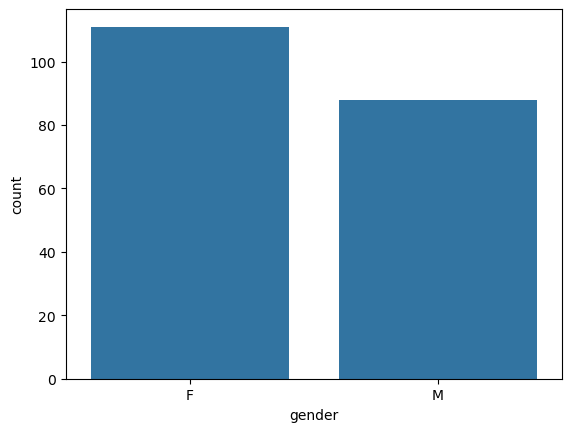

In [14]:
# Visualization using Bar chart
sns.countplot(x = "gender", data = df)

<Axes: xlabel='height', ylabel='weight'>

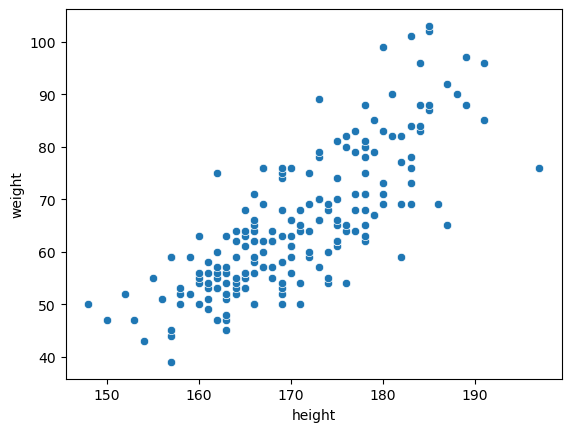

In [15]:
sns.scatterplot(x=df["height"], y =df["weight"])

In [16]:
df_dummies = pd.get_dummies(df['gender'], drop_first = True).astype(int)
df_dummies

,M
0,0
1,0
2,0
3,0
4,0
...,...
194,1
195,1
196,1
197,1


In [17]:
# combining 
df1 = pd.concat([df, df_dummies], axis = 1)
df1

,gender,weight,height,M
0,F,39,157,0
1,F,43,154,0
2,F,44,157,0
3,F,45,163,0
4,F,45,157,0
...,...,...,...,...
194,M,97,189,1
195,M,101,183,1
196,M,102,185,1
197,M,103,185,1


In [18]:
df1.drop(columns = ["gender"], inplace = True)
df1

,weight,height,M
0,39,157,0
1,43,154,0
2,44,157,0
3,45,163,0
4,45,157,0
...,...,...,...
194,97,189,1
195,101,183,1
196,102,185,1
197,103,185,1


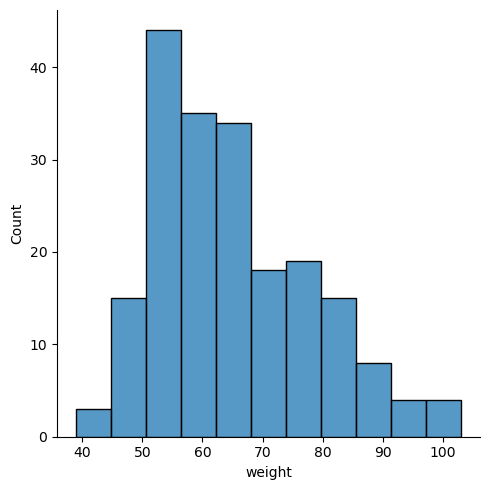

In [19]:
# checking correlation between weight and height
sns.displot(df1['weight'],kind = 'hist')

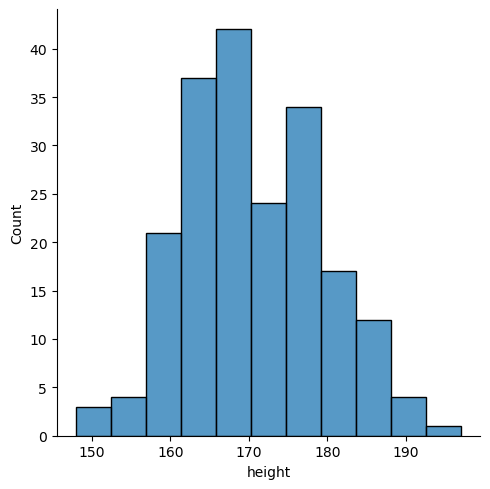

In [20]:
sns.displot(df1['height'],kind = 'hist')

In [21]:
df1["weight"].skew() 

0.7449402052268245

In [22]:
df1["height"].skew()

0.2129090698591845

<Axes: ylabel='height'>

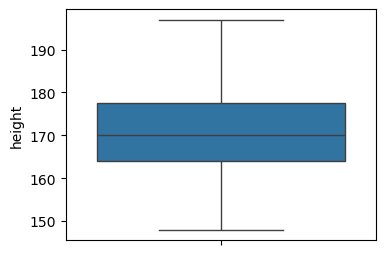

In [23]:
# checking Outliers
plt.figure(figsize=(4,3))
sns.boxplot(df1["height"])

<Axes: ylabel='weight'>

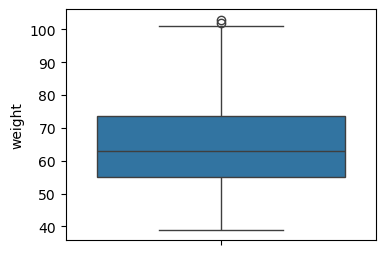

In [24]:
plt.figure(figsize=(4,3))
sns.boxplot(df1["weight"])

In [25]:
df1.isnull().sum()

weight    0
height    0
M         0
dtype: int64

In [26]:
# putting feature variable to X
X = df1.drop("weight", axis = 1)

In [27]:
# putting labelled to Y
Y = df1["weight"]

In [28]:
X

,height,M
0,157,0
1,154,0
2,157,0
3,163,0
4,157,0
...,...,...
194,189,1
195,183,1
196,185,1
197,185,1


In [29]:
Y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

### splitting the Data in training and testing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7 , random_state = 12)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((139, 2), (139,), (60, 2), (60,))

### Performance Metrix For Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Representing LinearRegression as model

model = LinearRegression()
model

LinearRegression()

In [35]:
# fit the model to the training
model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [37]:
print(model.intercept_)

-77.90658193188455


In [38]:
print(model.coef_)

[0.82001155 7.9819506 ]


<Axes: xlabel='M', ylabel='weight'>

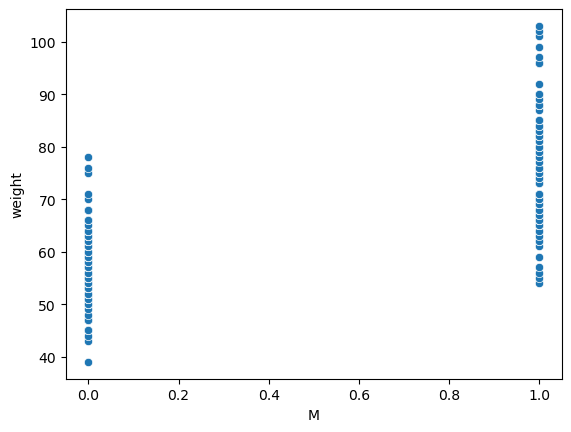

In [39]:
sns.scatterplot(x=df1["M"], y =df1["weight"] )

In [40]:
# making prediction

y_pred = model.predict(X_test)
y_pred

array([80.13748194, 58.21533502, 59.85535812, 76.85743575, 58.21533502,
       55.75530038, 77.67744729, 71.93736646, 54.93528883, 60.67536967,
       54.93528883, 61.49538122, 82.59751658, 43.45512716, 51.65524264,
       67.01729717, 84.23753968, 63.13540431, 75.21741265, 59.03534657,
       54.93528883, 76.0374242 , 57.39532348, 55.75530038, 76.85743575,
       67.83730872, 81.77750503, 56.57531193, 76.0374242 , 76.0374242 ,
       75.21741265, 76.0374242 , 73.57738955, 57.39532348, 69.47733181,
       48.37519645, 55.75530038, 59.85535812, 61.49538122, 54.93528883,
       53.29526574, 68.65732027, 71.93736646, 58.21533502, 55.75530038,
       56.57531193, 52.47525419, 45.09515026, 66.4154505 , 77.67744729,
       91.61764361, 67.83730872, 85.05755122, 57.39532348, 62.31539276,
       60.67536967, 85.05755122, 58.21533502, 47.5551849 , 86.69757432])

In [42]:
# Performance matrix

# coefficient of determination (R square)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)

In [44]:
from math import sqrt

rmse = sqrt(mse)

In [50]:
print('mean_squared_error:', mse)
print('root_mean_squared_error:', rmse)
print('r_square_value:',r_squared)

mean_squared_error: 64.254793335574
root_mean_squared_error: 8.015908765422296
r_square_value: 0.661438222561686


In [52]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
148,73,80.137482
11,50,58.215335
92,62,59.855358
124,67,76.857436
93,62,58.215335
21,52,55.755300
198,99,77.677447
62,57,71.937366
7,47,54.935289
29,53,60.675370


In [54]:
# let us try with feature Scaling
df1

,weight,height,M
0,39,157,0
1,43,154,0
2,44,157,0
3,45,163,0
4,45,157,0
...,...,...,...
194,97,189,1
195,101,183,1
196,102,185,1
197,103,185,1


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_trained_scaled

array([[ 0.15930019,  1.11442159],
       [ 0.87744269,  1.11442159],
       [-0.91791355, -0.89732648],
       [ 0.39868103, -0.89732648],
       [-1.15729438, -0.89732648],
       [ 1.11682352,  1.11442159],
       [-1.51636563, -0.89732648],
       [-1.2769848 , -0.89732648],
       [-1.03760396, -0.89732648],
       [-0.31946147, -0.89732648],
       [ 1.59558518,  1.11442159],
       [-0.67853272,  1.11442159],
       [-1.2769848 , -0.89732648],
       [ 0.87744269,  1.11442159],
       [-1.03760396, -0.89732648],
       [ 0.27899061,  1.11442159],
       [-0.91791355, -0.89732648],
       [-0.43915189, -0.89732648],
       [-0.31946147, -0.89732648],
       [-0.19977105, -0.89732648],
       [ 1.23651394,  1.11442159],
       [ 0.27899061,  1.11442159],
       [ 0.63806186,  1.11442159],
       [ 0.39868103,  1.11442159],
       [-1.39667521, -0.89732648],
       [ 0.51837144,  1.11442159],
       [ 1.7152756 ,  1.11442159],
       [ 1.11682352,  1.11442159],
       [-0.19977105,

In [62]:
X_test_scaled

array([[ 1.47589477,  1.11442159],
       [-0.5588423 , -0.89732648],
       [-0.31946147, -0.89732648],
       [ 0.9971331 ,  1.11442159],
       [-0.5588423 , -0.89732648],
       [-0.91791355, -0.89732648],
       [ 1.11682352,  1.11442159],
       [ 0.27899061,  1.11442159],
       [-1.03760396, -0.89732648],
       [-0.19977105, -0.89732648],
       [-1.03760396, -0.89732648],
       [-0.08008064, -0.89732648],
       [ 1.83496601,  1.11442159],
       [-2.71326978, -0.89732648],
       [-1.51636563, -0.89732648],
       [-0.43915189,  1.11442159],
       [ 2.07434685,  1.11442159],
       [ 0.15930019, -0.89732648],
       [ 0.75775227,  1.11442159],
       [-0.43915189, -0.89732648],
       [-1.03760396, -0.89732648],
       [ 0.87744269,  1.11442159],
       [-0.67853272, -0.89732648],
       [-0.91791355, -0.89732648],
       [ 0.9971331 ,  1.11442159],
       [-0.31946147,  1.11442159],
       [ 1.7152756 ,  1.11442159],
       [-0.79822313, -0.89732648],
       [ 0.87744269,

In [66]:
# fitting the scaled data into model again
model.fit(X_trained_scaled, Y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test_scaled)
y_pred

array([80.13748194, 58.21533502, 59.85535812, 76.85743575, 58.21533502,
       55.75530038, 77.67744729, 71.93736646, 54.93528883, 60.67536967,
       54.93528883, 61.49538122, 82.59751658, 43.45512716, 51.65524264,
       67.01729717, 84.23753968, 63.13540431, 75.21741265, 59.03534657,
       54.93528883, 76.0374242 , 57.39532348, 55.75530038, 76.85743575,
       67.83730872, 81.77750503, 56.57531193, 76.0374242 , 76.0374242 ,
       75.21741265, 76.0374242 , 73.57738955, 57.39532348, 69.47733181,
       48.37519645, 55.75530038, 59.85535812, 61.49538122, 54.93528883,
       53.29526574, 68.65732027, 71.93736646, 58.21533502, 55.75530038,
       56.57531193, 52.47525419, 45.09515026, 66.4154505 , 77.67744729,
       91.61764361, 67.83730872, 85.05755122, 57.39532348, 62.31539276,
       60.67536967, 85.05755122, 58.21533502, 47.5551849 , 86.69757432])

In [70]:
# coefficient of determination (R square)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)

In [72]:
from math import sqrt

rmse = sqrt(mse)

In [74]:
print('mean_squared_error:', mse)
print('root_mean_squared_error:', rmse)
print('r_square_value:',r_squared)

mean_squared_error: 64.254793335574
root_mean_squared_error: 8.015908765422296
r_square_value: 0.661438222561686
